In [62]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
import joblib
import warnings
warnings.filterwarnings('ignore')

max_depth_val = 5
learning_rate_val = 1.0
seed = 42

In [63]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
X_train, y_train = df_train.iloc[:,2:], df_train[['target']]
X_test = df_test.iloc[:,1:]

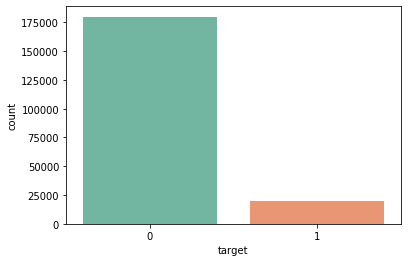

In [64]:
#Prelilminary Visualization
sns.countplot(y_train['target'], palette='Set2')

In [65]:
#Cleaning
def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent']) 
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    tt = tt.loc[tt['Percent'] > 0]
    return(np.transpose(tt))
missing_data(df_train)

""
Total
Percent
Types


In [66]:
#Feature Engineering
#Correlation between features and targets
features = X_train 
target = y_train
correlations = {}
pval = {}
for f in features.columns:
    x1 = features[f]
    x2 = target
    correlations[f],pval[f] = spearmanr(x1,x2)
    
data_correlations = pd.DataFrame(correlations, index=['Value']).T
data_correlations = data_correlations.loc[data_correlations['Value'].abs().sort_values(ascending=False).index]
data_correlations = data_correlations.iloc[0:30]
most_correlated_ftrs = data_correlations.index.to_list()
X_train, X_test = X_train[most_correlated_ftrs], X_test[most_correlated_ftrs]

In [67]:
#Simple DT
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=seed)

tree_clf = tree.DecisionTreeClassifier(max_depth=max_depth_val, random_state=seed)
tree_clf.fit(X_train, y_train)
y_pred_dtr = tree_clf.predict(X_val)

print('Acc: {}'.format(accuracy_score(y_val, y_pred_dtr)))

Acc: 0.8981


In [68]:
#Model Optimization

In [69]:
#Saving the model
joblib.dump(tree_clf, "DTModel.joblib.dat")

['DTModel.joblib.dat']

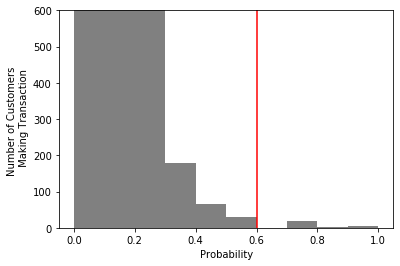

In [70]:
#Postprocessing
y_pred_prob_clf = tree_clf.predict_proba(X_val)[:,1]
plt.hist(y_pred_prob_clf, color = 'grey')
plt.ylim([0,600])
plt.axvline(x=0.6, color = 'red')
plt.xlabel('Probability')
plt.ylabel('Number of Customers \n Making Transaction')
plt.savefig('ProbDistr.png')